In [3]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

Define Model

In [2]:
class Model_1(nn.Module):
    def __init__(self,):
        super(Model_1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.final = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = nn.functional.relu(self.linear4(x))
        x = nn.functional.relu(self.linear5(x))
        x = nn.functional.relu(self.linear6(x))
        x = nn.functional.relu(self.linear7(x))

        x = self.final(x)
        return x
    
class Model_2(nn.Module):
    def __init__(self,):
        super(Model_2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.final = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.relu(self.linear1(x))
        x = nn.functional.relu(self.linear2(x))
        x = nn.functional.relu(self.linear3(x))
        x = nn.functional.relu(self.linear4(x))

        x = self.final(x)
        return x
 

class Model_3(nn.Module):
    def __init__(self,):
        super(Model_3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.final = nn.Linear(190, 1)
    
    def forward(self,x):
        x = nn.functional.relu(self.linear1(x))

        x = self.final(x)
        return x


Functions

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


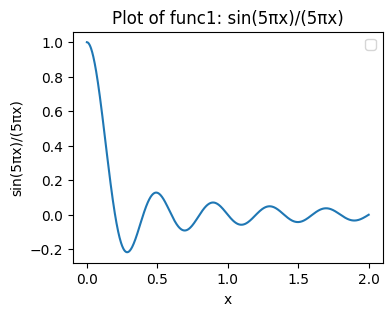

In [3]:
# Define the function
def func1(x):
    return np.sin(5 * np.pi * x) / (5 * np.pi * x)

# Generate x values
x1 = np.linspace(1e-6, 2, 1000)

# Compute y values
y1 = func1(x1)

# Plot the function
plt.figure(figsize=(4, 3))
plt.plot(x1, y1)
plt.title('Plot of func1: sin(5πx)/(5πx)')
plt.xlabel('x')
plt.ylabel('sin(5πx)/(5πx)')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


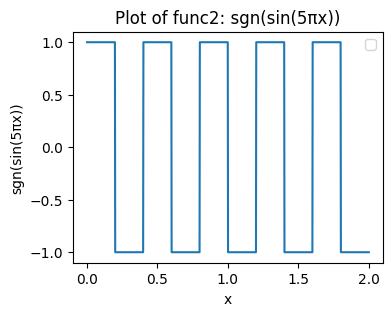

In [4]:
# Define the function
def func2(x):
    return np.sign(np.sin(5*np.pi*x))

# Generate x values
x2 = np.linspace(1e-6, 2, 1000)

# Compute y values
y2 = func2(x2)

# Plot the function
plt.figure(figsize=(4, 3))
plt.plot(x2, y2)
plt.title('Plot of func2: sgn(sin(5πx))')
plt.xlabel('x')
plt.ylabel('sgn(sin(5πx))')
plt.legend()
plt.show()

Simulate func1

In [17]:
loss_func = torch.nn.MSELoss()
model_1_func1 = Model_1()
model_2_func1 = Model_2()
model_3_func1 = Model_3()
optimizer_model1_func1 = torch.optim.Adam(model_1_func1.parameters(), lr=0.001)
optimizer_model2_func1 = torch.optim.Adam(model_2_func1.parameters(), lr=0.001)
optimizer_model3_func1 = torch.optim.Adam(model_3_func1.parameters(), lr=0.001)

input = torch.tensor(x1).unsqueeze(1).float()
label = torch.tensor(y1).unsqueeze(1).float()

max_epoch = 20000

model_1_func1_loss = []
for i in range(max_epoch):
    pred_model1_func1 = model_1_func1(input)
    loss = loss_func(pred_model1_func1, label)
    optimizer_model1_func1.zero_grad() 
    loss.backward() 
    optimizer_model1_func1.step()
    model_1_func1_loss.append(loss.item())

model_2_func1_loss = []
for i in range(max_epoch):
    pred_model2_func1 = model_2_func1(input)
    loss = loss_func(pred_model2_func1, label)
    optimizer_model2_func1.zero_grad() 
    loss.backward() 
    optimizer_model2_func1.step()
    model_2_func1_loss.append(loss.item())

model_3_func1_loss = []
for i in range(max_epoch):
    pred_model3_func1 = model_3_func1(input)
    loss = loss_func(pred_model3_func1, label)
    optimizer_model3_func1.zero_grad() 
    loss.backward() 
    optimizer_model3_func1.step()
    model_3_func1_loss.append(loss.item())

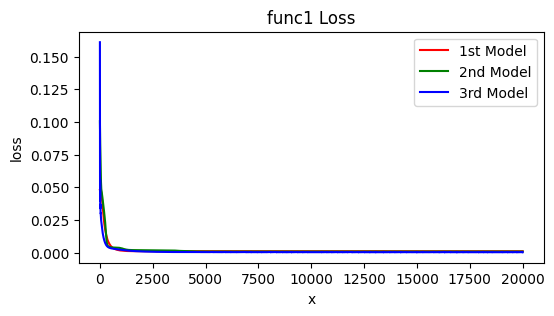

In [25]:
plt.figure(figsize=(6,3))
plt.plot([i for i in range(max_epoch)], model_1_func1_loss, color="r", label = '1st Model')
plt.plot([i for i in range(max_epoch)], model_2_func1_loss, color="g", label = '2nd Model')
plt.plot([i for i in range(max_epoch)], model_3_func1_loss, color="b", label = '3rd Model')
plt.title('func1 Loss')
plt.xlabel('x')
plt.ylabel('loss')
plt.legend()
plt.show()

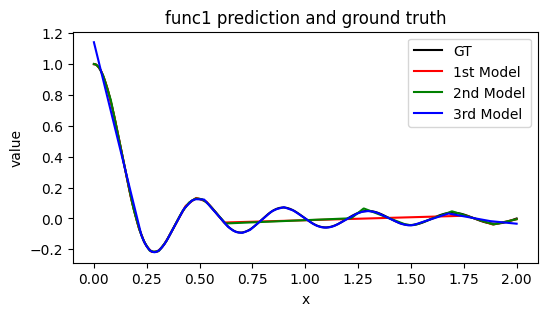

In [24]:
plt.figure(figsize=(6,3))
plt.plot(x1, y1, color="black", label = 'GT')
plt.plot(x1, pred_model1_func1.clone().detach().numpy(), color="r", label = '1st Model')
plt.plot(x1, pred_model2_func1.clone().detach().numpy(), color="g", label = '2nd Model')
plt.plot(x1, pred_model3_func1.clone().detach().numpy(), color="b", label = '3rd Model')
plt.title('func1 prediction and ground truth')
plt.xlabel('x')
plt.ylabel('value')
plt.legend()
plt.show()

simulate func2

In [31]:
loss_func = torch.nn.MSELoss()
model_1_func2 = Model_1()
model_2_func2 = Model_2()
model_3_func2 = Model_3()
optimizer_model1_func2 = torch.optim.Adam(model_1_func2.parameters(), lr=0.001)
optimizer_model2_func2 = torch.optim.Adam(model_2_func2.parameters(), lr=0.001)
optimizer_model3_func2 = torch.optim.Adam(model_3_func2.parameters(), lr=0.001)

input = torch.tensor(x2).unsqueeze(1).float()
label = torch.tensor(y2).unsqueeze(1).float()

max_epoch = 20000

model_1_func2_loss = []
for i in range(max_epoch):
    pred_model1_func2 = model_1_func2(input)
    loss = loss_func(pred_model1_func2, label)
    optimizer_model1_func2.zero_grad() 
    loss.backward() 
    optimizer_model1_func2.step()
    model_1_func2_loss.append(loss.item())

model_2_func2_loss = []
for i in range(max_epoch):
    pred_model2_func2 = model_2_func2(input)
    loss = loss_func(pred_model2_func2, label)
    optimizer_model2_func2.zero_grad() 
    loss.backward() 
    optimizer_model2_func2.step()
    model_2_func2_loss.append(loss.item())

model_3_func2_loss = []
for i in range(max_epoch):
    pred_model3_func2 = model_3_func2(input)
    loss = loss_func(pred_model3_func2, label)
    optimizer_model3_func2.zero_grad() 
    loss.backward() 
    optimizer_model3_func2.step()
    model_3_func2_loss.append(loss.item())

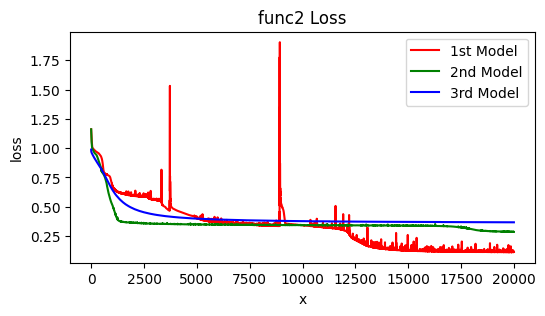

In [32]:
plt.figure(figsize=(6,3))
plt.plot([i for i in range(max_epoch)], model_1_func2_loss, color="r", label = '1st Model')
plt.plot([i for i in range(max_epoch)], model_2_func2_loss, color="g", label = '2nd Model')
plt.plot([i for i in range(max_epoch)], model_3_func2_loss, color="b", label = '3rd Model')
plt.title('func2 Loss')
plt.xlabel('x')
plt.ylabel('loss')
plt.legend()
plt.show()

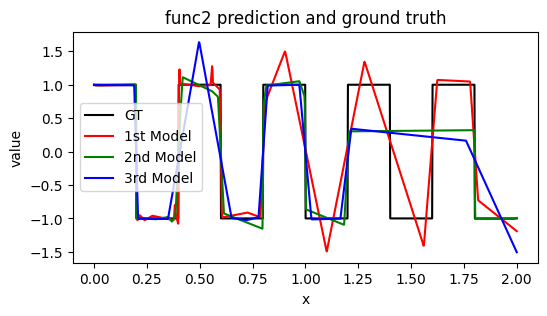

In [33]:
plt.figure(figsize=(6,3))
plt.plot(x2, y2, color="black", label = 'GT')
plt.plot(x1, pred_model1_func2.clone().detach().numpy(), color="r", label = '1st Model')
plt.plot(x1, pred_model2_func2.clone().detach().numpy(), color="g", label = '2nd Model')
plt.plot(x1, pred_model3_func2.clone().detach().numpy(), color="b", label = '3rd Model')
plt.title('func2 prediction and ground truth')
plt.xlabel('x')
plt.ylabel('value')
plt.legend()
plt.show()

In [37]:
model_1_func1 = Model_1()

In [40]:

from torchsummary import summary
summary(model_1_func1, input_size=(728,1), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 728, 5]              10
            Linear-2              [-1, 728, 10]              60
            Linear-3              [-1, 728, 10]             110
            Linear-4              [-1, 728, 10]             110
            Linear-5              [-1, 728, 10]             110
            Linear-6              [-1, 728, 10]             110
            Linear-7               [-1, 728, 5]              55
            Linear-8               [-1, 728, 1]               6
Total params: 571
Trainable params: 571
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.34
Params size (MB): 0.00
Estimated Total Size (MB): 0.34
----------------------------------------------------------------


In [42]:
summary(model_2_func1, input_size=(728,1), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 728, 10]              20
            Linear-2              [-1, 728, 18]             198
            Linear-3              [-1, 728, 15]             285
            Linear-4               [-1, 728, 4]              64
            Linear-5               [-1, 728, 1]               5
Total params: 572
Trainable params: 572
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.27
Params size (MB): 0.00
Estimated Total Size (MB): 0.27
----------------------------------------------------------------


In [44]:
summary(model_3_func1, input_size=(728,1), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 728, 190]             380
            Linear-2               [-1, 728, 1]             191
Total params: 571
Trainable params: 571
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.06
Params size (MB): 0.00
Estimated Total Size (MB): 1.07
----------------------------------------------------------------


In [42]:
class CNN_Model1(nn.Module):
    def __init__(self, in_channel, data_set):
        super().__init__()
        self.conv = nn.Conv2d(in_channel, 6, kernel_size=3, stride=1,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        if data_set == 'mnist':
            self.fc = nn.Linear(6*14*14, 10)
        else:
            self.fc = nn.Linear(6*16*16, 10)
    
    def forward(self, x):       
        x = nn.functional.relu(self.conv(x)) 
        x = self.pool(x)         
        x = torch.flatten(x, 1)  
        x = self.fc(x)           
        return x

class CNN_Model2(nn.Module):
    def __init__(self, in_channel, data_set):
        super().__init__()
        self.conv = nn.Conv2d(in_channel, 12, kernel_size=3, stride=1,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        if data_set == 'mnist':
            self.fc = nn.Linear(12*14*14, 10)
        else:
            self.fc = nn.Linear(12*16*16, 10)
    
    def forward(self, x):       
        x = nn.functional.relu(self.conv(x)) 
        x = self.pool(x)         
        x = torch.flatten(x, 1)  
        x = self.fc(x)           
        return x
    
class CNN_Model3(nn.Module):
    def __init__(self, in_channel, data_set):
        super().__init__()
        self.conv = nn.Conv2d(in_channel, 6, kernel_size=3, stride=1,padding=1)
        self.conv2 = nn.Conv2d(6, 12, kernel_size=3, stride=1,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        if data_set == 'mnist':
            self.fc = nn.Linear(12*14*14, 10)
        else:
            self.fc = nn.Linear(12*16*16, 10)
    
    def forward(self, x):       
        x = nn.functional.relu(self.conv(x))
        x = nn.functional.relu(self.conv2(x)) 
        x = self.pool(x)         
        x = torch.flatten(x, 1)  
        x = self.fc(x)           
        return x

model1_mnist = CNN_Model1(1, 'mnist')
model1_cifar10 = CNN_Model1(3, 'cifar10')

In [55]:
summary(model1_mnist, input_size=(1, 28, 28), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Linear-3                   [-1, 10]          11,770
Total params: 11,830
Trainable params: 11,830
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.05
Estimated Total Size (MB): 0.09
----------------------------------------------------------------


In [56]:
summary(model1_cifar10, input_size=(3, 32, 32), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 32, 32]             168
         MaxPool2d-2            [-1, 6, 16, 16]               0
            Linear-3                   [-1, 10]          15,370
Total params: 15,538
Trainable params: 15,538
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.06
Params size (MB): 0.06
Estimated Total Size (MB): 0.13
----------------------------------------------------------------


In [38]:
batch_size = 1024

trainset = torchvision.datasets.MNIST('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle=True)

testset = torchvision.datasets.MNIST('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader = torch.utils.data.DataLoader(testset ,batch_size = batch_size, shuffle=True)

In [39]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device  = "mps"
else:
    device  = "cpu"

In [40]:
def test_test_data(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images,labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

def test_train_data(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader:
            images,labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

In [50]:
model1_mnist = CNN_Model1(1, 'mnist')
model2_mnist = CNN_Model2(1, 'mnist')
model3_mnist = CNN_Model3(1, 'mnist')
acc_test_mnist = {'0':[], '1':[], '2':[]}
acc_train_mnist = {'0':[], '1':[], '2':[]}
loss_mnist = {'0':[], '1':[], '2':[]}


model1_cifar10 = CNN_Model1(3, 'cifar10')

max_epoch = 50

model_mnist_list = [model1_mnist, model2_mnist, model3_mnist]

for model_id, model in enumerate(model_mnist_list):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
    model.to(device)
    for epoch in range(max_epoch):
        acc_test_mnist[str(model_id)].append(test_test_data(model))
        acc_train_mnist[str(model_id)].append(test_train_data(model))
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_mnist[str(model_id)].append(loss.item())


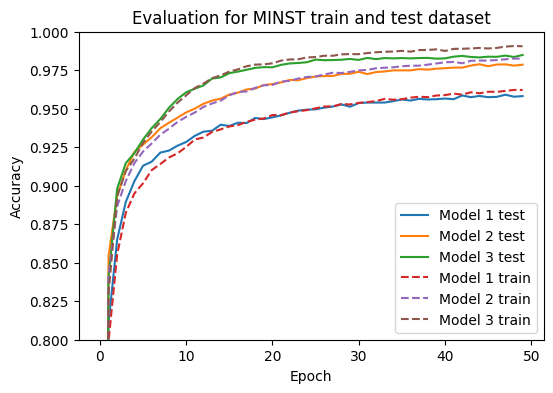

In [85]:
fig = plt.figure(figsize=(6, 4))
plt.plot(acc_test_mnist['0'], label = 'Model 1 test')
plt.plot(acc_test_mnist['1'], label = 'Model 2 test')
plt.plot(acc_test_mnist['2'], label = 'Model 3 test')
plt.plot(acc_train_mnist['0'], linestyle='dashed', label = 'Model 1 train')
plt.plot(acc_train_mnist['1'], linestyle='dashed', label = 'Model 2 train')
plt.plot(acc_train_mnist['2'], linestyle='dashed', label = 'Model 3 train')
plt.ylim(0.8,1)
plt.title('Evaluation for MINST train and test dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

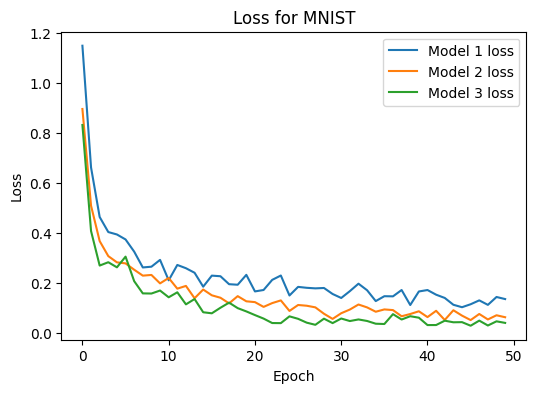

In [90]:
fig = plt.figure(figsize=(6, 4))
plt.plot(loss_mnist['0'], label = 'Model 1 loss')
plt.plot(loss_mnist['1'], label = 'Model 2 loss')
plt.plot(loss_mnist['2'], label = 'Model 3 loss')

plt.title('Loss for MNIST')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [62]:
batch_size = 1024

trainset_cifar = torchvision.datasets.CIFAR10('data', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))
train_loader_cifar = torch.utils.data.DataLoader(trainset_cifar, batch_size = batch_size, shuffle=True)

testset_cifar = torchvision.datasets.CIFAR10('data', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
test_loader_cifar = torch.utils.data.DataLoader(testset_cifar ,batch_size = batch_size, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [63]:
def test_test_data_cifar(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader_cifar:
            images,labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

def test_train_data_cifar(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_loader_cifar:
            images,labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data,dim=1)      
            total += labels.size(0)
            correct += (predicted==labels).sum().item()
            
    return correct/total

In [92]:
model1_cifar10  = CNN_Model1(3, 'cifar10')
model2_cifar10  = CNN_Model2(3, 'cifar10')
model3_cifar10  = CNN_Model3(3, 'cifar10')
acc_test_cifar10 = {'0':[], '1':[], '2':[]}
acc_train_cifar10 = {'0':[], '1':[], '2':[]}
loss_cifar10 = {'0':[], '1':[], '2':[]}


max_epoch = 100

model_cifar10_list = [model1_cifar10, model2_cifar10, model3_cifar10]

for model_id, model in enumerate(model_cifar10_list):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
    model.to(device)

    for epoch in range(max_epoch):
        acc_test_cifar10[str(model_id)].append(test_test_data_cifar(model))
        acc_train_cifar10[str(model_id)].append(test_train_data_cifar(model))

        for i, (images, labels) in enumerate(train_loader_cifar):
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_cifar10[str(model_id)].append(loss.item())

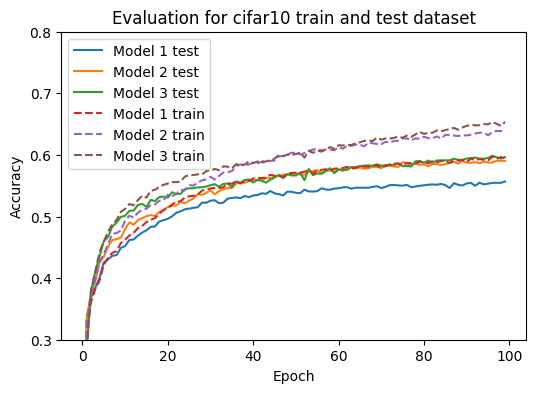

In [94]:
fig = plt.figure(figsize=(6, 4))
plt.plot(acc_test_cifar10['0'], label = 'Model 1 test')
plt.plot(acc_test_cifar10['1'], label = 'Model 2 test')
plt.plot(acc_test_cifar10['2'], label = 'Model 3 test')
plt.plot(acc_train_cifar10['0'], linestyle='dashed', label = 'Model 1 train')
plt.plot(acc_train_cifar10['1'], linestyle='dashed', label = 'Model 2 train')
plt.plot(acc_train_cifar10['2'], linestyle='dashed', label = 'Model 3 train')
plt.ylim(0.3,0.8)
plt.title('Evaluation for cifar10 train and test dataset')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

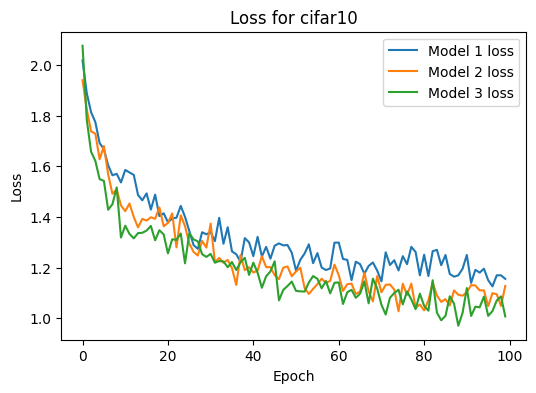

In [95]:
fig = plt.figure(figsize=(6, 4))
plt.plot(loss_cifar10['0'], label = 'Model 1 loss')
plt.plot(loss_cifar10['1'], label = 'Model 2 loss')
plt.plot(loss_cifar10['2'], label = 'Model 3 loss')

plt.title('Loss for cifar10')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
from torchsummary import summary

In [105]:
summary(model3_mnist.to('cpu'), input_size=(1, 28, 28), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]              60
            Conv2d-2           [-1, 12, 28, 28]             660
         MaxPool2d-3           [-1, 12, 14, 14]               0
            Linear-4                   [-1, 10]          23,530
Total params: 24,250
Trainable params: 24,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.13
Params size (MB): 0.09
Estimated Total Size (MB): 0.22
----------------------------------------------------------------


In [104]:
summary(model3_cifar10.to('cpu'), input_size=(3, 32, 32), batch_size=-1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 32, 32]             168
            Conv2d-2           [-1, 12, 32, 32]             660
         MaxPool2d-3           [-1, 12, 16, 16]               0
            Linear-4                   [-1, 10]          30,730
Total params: 31,558
Trainable params: 31,558
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.16
Params size (MB): 0.12
Estimated Total Size (MB): 0.30
----------------------------------------------------------------
